In [14]:
import pandas as pd

file_path = 'Scenario Data Set.xlsx'

df = pd.read_excel(file_path, sheet_name=1)



In [15]:
df.shape

(4743, 23)

In [16]:
print(df.isnull().sum())

student_id                    0
CAMPUS                        0
residency_az                  0
gender_f                      0
IPEDSEthnicity                0
soc                           0
CoreGPA                     180
fall_earned_hrs               0
fall_sem_gpa                  0
FallProbation                33
fall_prob                     0
spr_earned_hrs                0
spr_sem_gpa                   0
spr_cum_gpa                   0
AcademicStanding            765
ret_1                         0
ret_2                         0
AcademicLevelBeginofTerm      4
AcademicLevelEndofTerm        4
asc_outreach                  0
asc_ment                      0
ur_minority                   0
soph_level                    0
dtype: int64


In [17]:
print(df['CoreGPA'].describe())
print("Skewness:", df['CoreGPA'].skew())
print("Mode:", df['CoreGPA'].mode()[0])

count    4563.000000
mean        3.524578
std         0.337594
min         1.970000
25%         3.250000
50%         3.580000
75%         3.810000
max         4.570000
Name: CoreGPA, dtype: float64
Skewness: -0.4427625499019705
Mode: 4.0


In [18]:
print(df['AcademicStanding'].value_counts())


AcademicStanding
Good Academic Standing    3920
Continuing Probation        58
Name: count, dtype: int64


In [19]:
print(df['FallProbation'].value_counts())


FallProbation
Good Standing         4139
Probation              567
Suspended                3
Continue Probation       1
Name: count, dtype: int64


While handling missing values When data is normally distributed(with minimal outliers) the null values can be replaced with mean

When data is skewed then null replaced with median

When data is categorical then replace with mode

For Numerical Columns (CoreGPA): If Skewness is close to 0 and the distribution looks normal, we will use mean. If Skewness is high and the distribution is skewed, we will use median.

For Categorical Columns (AcademicStanding, FallProbation): Using mode for imputation.

In [20]:
if abs(df['CoreGPA'].skew()) < 0.5:
    df['CoreGPA'].fillna(df['CoreGPA'].mean(), inplace=True)
else:
    df['CoreGPA'].fillna(df['CoreGPA'].median(), inplace=True)

df['AcademicStanding'].fillna(df['AcademicStanding'].mode()[0], inplace=True)
df['FallProbation'].fillna(df['FallProbation'].mode()[0], inplace=True)

# Handle gender_f column
df['gender_f'].replace(2, pd.NA, inplace=True)
df.dropna(subset=['gender_f'], inplace=True)

In [21]:

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Verify the number of samples available
print(f'Number of samples after cleaning: {len(df)}')

# Encode

student_id                  0
CAMPUS                      0
residency_az                0
gender_f                    0
IPEDSEthnicity              0
soc                         0
CoreGPA                     0
fall_earned_hrs             0
fall_sem_gpa                0
FallProbation               0
fall_prob                   0
spr_earned_hrs              0
spr_sem_gpa                 0
spr_cum_gpa                 0
AcademicStanding            0
ret_1                       0
ret_2                       0
AcademicLevelBeginofTerm    4
AcademicLevelEndofTerm      4
asc_outreach                0
asc_ment                    0
ur_minority                 0
soph_level                  0
dtype: int64
Number of samples after cleaning: 4729


Exploratory Data Analysis

In [22]:
# Convert categorical variables to numeric
df['AcademicLevelBeginofTerm'] = df['AcademicLevelBeginofTerm'].astype('category').cat.codes
df['AcademicLevelEndofTerm'] = df['AcademicLevelEndofTerm'].astype('category').cat.codes
df['FallProbation'] = df['FallProbation'].astype('category').cat.codes
df['AcademicStanding'] = df['AcademicStanding'].astype('category').cat.codes
df['CAMPUS'] = df['CAMPUS'].astype('category').cat.codes  # Converting CAMPUS to numeric
df['gender_f'] = df['gender_f'].astype('category').cat.codes  # Converting gender_f to numeric
df['IPEDSEthnicity'] = df['IPEDSEthnicity'].astype('category').cat.codes  # Converting IPEDSEthnicity to numeric


# Verify the data types and summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 4729 entries, 0 to 4742
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                4729 non-null   int64  
 1   CAMPUS                    4729 non-null   int8   
 2   residency_az              4729 non-null   int64  
 3   gender_f                  4729 non-null   int8   
 4   IPEDSEthnicity            4729 non-null   int8   
 5   soc                       4729 non-null   int64  
 6   CoreGPA                   4729 non-null   float64
 7   fall_earned_hrs           4729 non-null   int64  
 8   fall_sem_gpa              4729 non-null   float64
 9   FallProbation             4729 non-null   int8   
 10  fall_prob                 4729 non-null   int64  
 11  spr_earned_hrs            4729 non-null   int64  
 12  spr_sem_gpa               4729 non-null   float64
 13  spr_cum_gpa               4729 non-null   float64
 14  AcademicStand

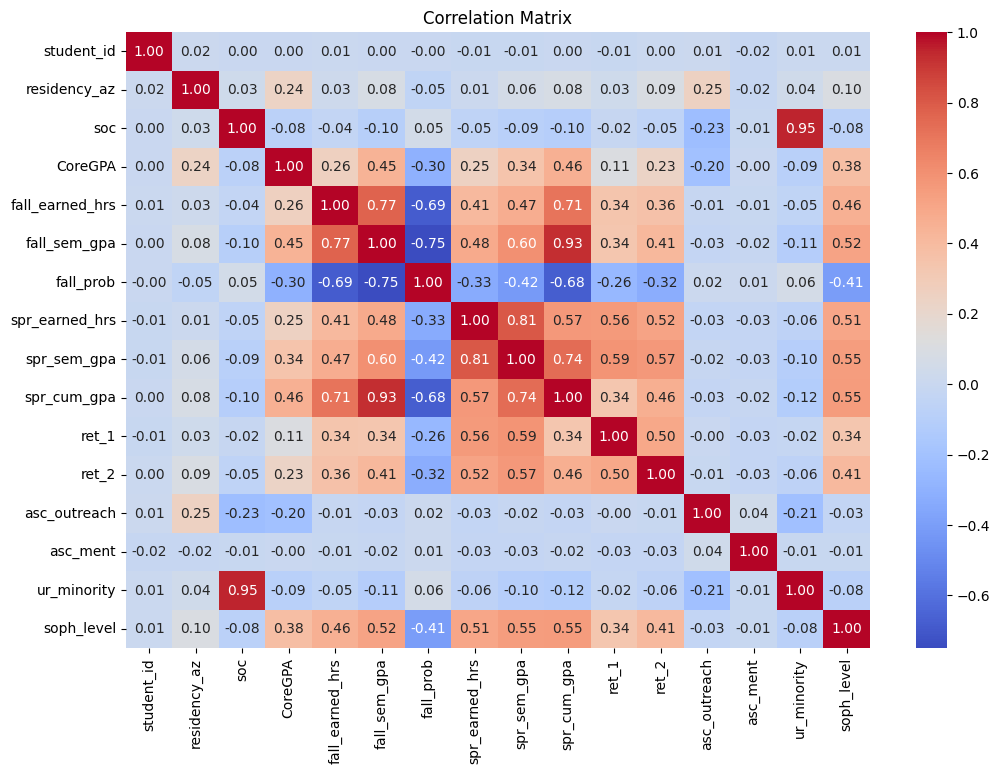

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix - exclude non-numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Strong Positive Correlations: For values close to 1. For example, fall_earned_hrs and spr_earned_hrs have a strong positive correlation, indicating students who earn more hours in the fall tend to earn more in the spring.

Strong Negative Correlations: For values close to -1. For example, CoreGPA and fall_prob (likely indicating probability of failure) have a negative correlation, suggesting students with higher GPAs are less likely to fail.

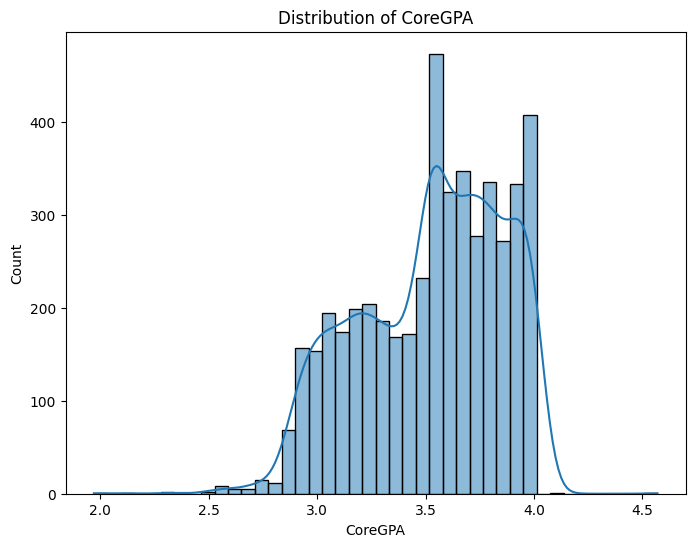

In [24]:
# Distribution of CoreGPA
plt.figure(figsize=(8, 6))
sns.histplot(df['CoreGPA'], kde=True)
plt.title('Distribution of CoreGPA')
plt.show()



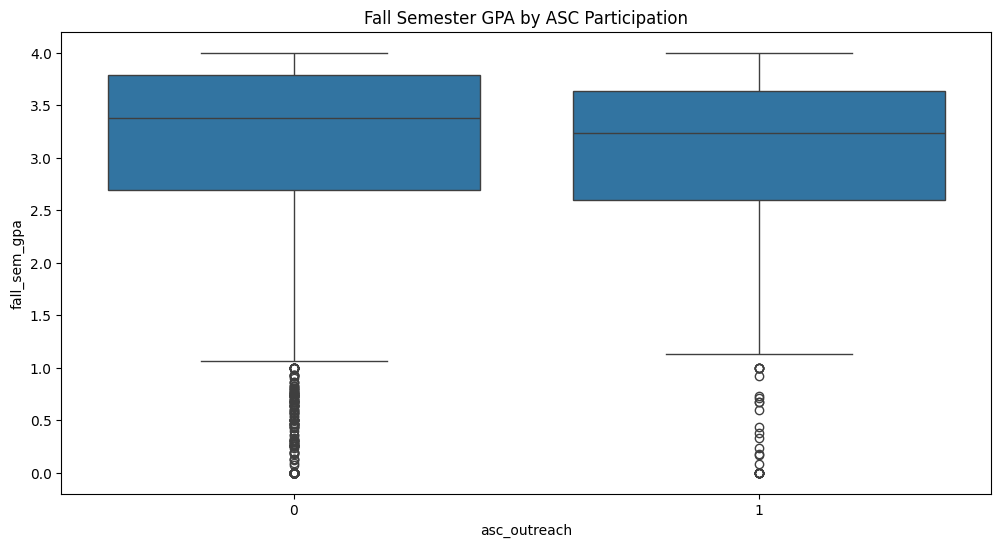

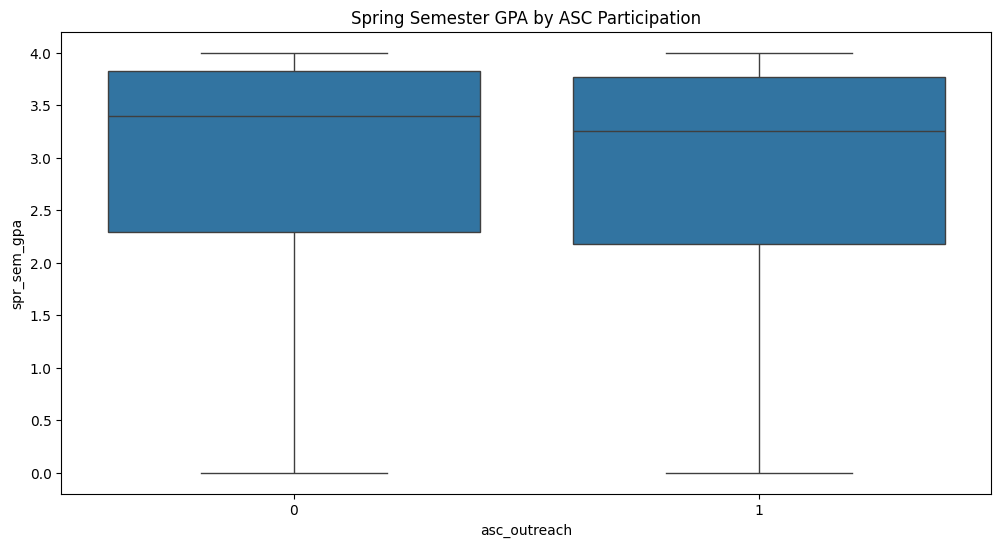

In [25]:
# Box plots for academic performance by ASC participation
plt.figure(figsize=(12, 6))
sns.boxplot(x='asc_outreach', y='fall_sem_gpa', data=df)
plt.title('Fall Semester GPA by ASC Participation')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='asc_outreach', y='spr_sem_gpa', data=df)
plt.title('Spring Semester GPA by ASC Participation')
plt.show()

**Fall**

The median Fall semester GPA for the group that participated in ASC outreach (asc_outreach = 1) appears to be slightly higher than the median for the group that did not participate (asc_outreach = 0).

There are more outliers in the group that did not participate in ASC outreach

Overall, this box plot provides a visual summary of how spring semester GPA varies between students who participated in ASC outreach and those who did not. It suggests a potential positive impact of ASC outreach on student performance, but further statistical analysis is needed to confirm this observation.

**Spring**

The median GPA (the line within the box) appears to be slightly higher for students who participated in ASC programs compared to those who did not. This suggests a potential positive impact of ASC participation on academic performance.

Overall, the box plot suggests a possible positive association between ASC participation and Spring Semester GPA.

In [26]:
import statsmodels.api as sm

# Prepare the data for regression
X = df[['asc_outreach', 'asc_ment', 'CoreGPA', 'gender_f', 'residency_az', 'soc', 'ur_minority', 'fall_earned_hrs', 'spr_earned_hrs']]
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fall Semester GPA
y_fall = df['fall_sem_gpa']  # Target variable for fall semester GPA
model_fall = sm.OLS(y_fall, X).fit()
print(model_fall.summary())



                            OLS Regression Results                            
Dep. Variable:           fall_sem_gpa   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1136.
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:32:32   Log-Likelihood:                -3759.4
No. Observations:                4729   AIC:                             7539.
Df Residuals:                    4719   BIC:                             7603.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.0377      0.091    -

**OLS Regression Results Interpretation for FALL SEMESTER**

1. Coefficients and Significance:

ASC Outreach (asc_outreach): 0.0825 (p = 0.004)

Interpretation: Students who participated in ASC outreach have a GPA that is, on average, 0.0825 points higher than those who did not, holding other factors constant. This coefficient is statistically significant (p < 0.05), suggesting a positive effect of ASC outreach on Fall semester GPA.

Core GPA (CoreGPA): 0.6730 (p < 0.0001)

Interpretation: For each one-unit increase in CoreGPA, Fall semester GPA increases by 0.6730 points, which is highly significant. This highlights the strong impact of academic preparation on GPA.

Gender (gender_f): 0.0901 (p < 0.0001)

Interpretation: Gender has a statistically significant positive effect on GPA. Given that this is a coded variable, the interpretation would depend on the coding scheme.

Fall Earned Hours (fall_earned_hrs): 0.1757 (p < 0.0001)

Interpretation: Each additional credit hour earned in the fall semester is associated with a 0.1757 increase in GPA. This is statistically significant and highlights the importance of credit accumulation on GPA.

Spring Earned Hours (spr_earned_hrs): 0.0264 (p < 0.0001)

Interpretation: Each additional credit hour earned in the spring semester is associated with a 0.0264 increase in GPA. This is also statistically significant, though the effect size is smaller compared to fall earned hours.


2. Model Summary:
R-squared: 0.684

Interpretation: Approximately 68.4% of the variance in Fall semester GPA is explained by the model. This indicates a good fit of the model to the data.
F-statistic: 1136 (p < 0.0001)

Interpretation: The overall model is statistically significant, indicating that the predictors collectively have a significant effect on Fall semester GPA.




In [27]:

# Spring Semester GPA
y_spring = df['spr_sem_gpa']  # Target variable for spring semester GPA
model_spring = sm.OLS(y_spring, X).fit()
print(model_spring.summary())

                            OLS Regression Results                            
Dep. Variable:            spr_sem_gpa   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:32:34   Log-Likelihood:                -5366.1
No. Observations:                4729   AIC:                         1.075e+04
Df Residuals:                    4719   BIC:                         1.082e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.7037      0.128    -

**OLS Regression Results Interpretation**
1. **Coefficients and Significance**:

ASC Outreach (asc_outreach): 0.1189 (p = 0.003)

Interpretation: Students who participated in ASC outreach have a GPA that is, on average, 0.1189 points higher in the Spring semester compared to those who did not participate, holding other factors constant. This effect is statistically significant (p < 0.05), suggesting a positive impact of ASC outreach on Spring semester GPA.

Core GPA (CoreGPA): 0.5104 (p < 0.0001)

Interpretation: Each one-unit increase in CoreGPA is associated with a 0.5104 increase in Spring semester GPA. This is highly significant and underscores the importance of academic preparation.

Fall Earned Hours (fall_earned_hrs): 0.0548 (p < 0.0001)

Interpretation: Each additional credit hour earned in the fall semester is associated with a 0.0548 increase in Spring semester GPA. This is statistically significant, indicating that credit accumulation has a positive effect on GPA.

Spring Earned Hours (spr_earned_hrs): 0.1722 (p < 0.0001)

Interpretation: Each additional credit hour earned in the spring semester is associated with a 0.1722 increase in Spring semester GPA. This effect is also significant and highlights the importance of credit accumulation in the spring.

**2. Model Summary:**
R-squared: 0.693

Interpretation: Approximately 69.3% of the variance in Spring semester GPA is explained by the model. This indicates a good fit of the model to the data.
F-statistic: 1186 (p < 0.0001)

Interpretation: The overall model is statistically significant, suggesting that the predictors collectively have a significant effect on Spring semester GPA.

In [28]:
df.columns

Index(['student_id', 'CAMPUS', 'residency_az', 'gender_f', 'IPEDSEthnicity',
       'soc', 'CoreGPA', 'fall_earned_hrs', 'fall_sem_gpa', 'FallProbation',
       'fall_prob', 'spr_earned_hrs', 'spr_sem_gpa', 'spr_cum_gpa',
       'AcademicStanding', 'ret_1', 'ret_2', 'AcademicLevelBeginofTerm',
       'AcademicLevelEndofTerm', 'asc_outreach', 'asc_ment', 'ur_minority',
       'soph_level'],
      dtype='object')

In [29]:
from scipy.stats import chi2_contingency

# Create contingency table for Ret_1 and Asc_outreach
contingency_table_ret1 = pd.crosstab(df['ret_1'], df['asc_outreach'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_ret1)
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value}")



Chi2 Stat: 0.0, p-value: 1.0


In [30]:

# Create contingency table for Ret_2 and Asc_outreach
contingency_table_ret2 = pd.crosstab(df['ret_2'], df['asc_outreach'])

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table_ret2)
print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value}")

Chi2 Stat: 0.15158126984703568, p-value: 0.6970287971884461


No Significant Association: Both Chi-Square tests suggest that ASC outreach is not significantly associated with student retention in either scenario (Ret_1 or Ret_2).
Implications: The lack of a significant relationship implies that ASC outreach, in isolation, may not be a strong predictor of student retention based on this analysis. Other factors or combined approaches might be influencing retention.

In [31]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame with relevant columns
X = df[['asc_outreach']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['ret_1']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.265493
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ret_1   No. Observations:                 4729
Model:                          Logit   Df Residuals:                     4727
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:               1.591e-06
Time:                        19:22:49   Log-Likelihood:                -1255.5
converged:                       True   LL-Null:                       -1255.5
Covariance Type:            nonrobust   LLR p-value:                    0.9496
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5186      0.058     43.070      0.000       2.404       2.633
asc_outreach    -0.0114

In [32]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame with relevant columns
X = df[['asc_outreach']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['ret_2']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.544398
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  ret_2   No. Observations:                 4729
Model:                          Logit   Df Residuals:                     4727
Method:                           MLE   Df Model:                            1
Date:                Sun, 28 Jul 2024   Pseudo R-squ.:               3.830e-05
Time:                        19:23:56   Log-Likelihood:                -2574.5
converged:                       True   LL-Null:                       -2574.6
Covariance Type:            nonrobust   LLR p-value:                    0.6570
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1894      0.036     32.751      0.000       1.118       1.261
asc_outreach    -0.0496